## Supervised Learning

In Supervised Learning, algorithms learn from **labeled** data. The trained algorithm should be able to determine which label should be given to new data based on pattern and associating the patterns to the unlabeled new data.

Supervised Learning is divided into two types:

> **Classification**: In this setting the model tries to qualitatively label that data. For example: Gender predictions, Spam classification.

> **Regression**: The target varible in a regression problem is continuous(quantitative). For example: House price prediction, Stock price prediction.

## Linear Regression

Linear Regression assumes that the output we are going to predict and the inputs have a linear relationship. The goal of a Linear Regression model is to find out the parameters that best model this linear dependency.

In [3]:
# import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# do not display warnings in notebook 
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Formulate a linear function
w_0 = 0.4
w_1 = 0.6

x = np.random.random(100) # independent variable
random_noise = np.random.normal(0, 0.01, 100) # to make the model robust

y = w_0 + w_1 * x + random_noise # calculate the dependent variable

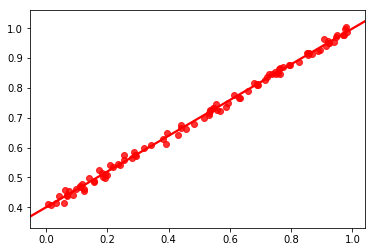

In [5]:
ax = sns.regplot(x=x, y=y, color="r")

# Training a Machine Learning model

We train a Linear Regression model on the training data to determine the parameters $w_{0}$, $w_{1}$. We start with some randomly chosen $w_{0}$, $w_{1}$ and calculate an **Objective Function**/**Loss Function**. And then we move around the $w_{0}$, $w_{1}$ so that this objective function is minimized.

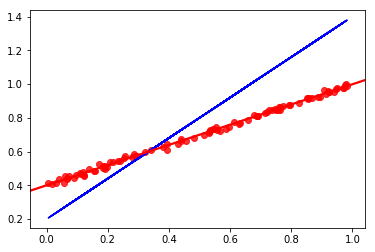

In [6]:
# start with some random parameters
w_0_ = 0.2
w_1_ = 1.2

plt.plot(x, w_0_ + w_1_*x, color="b")
ax = sns.regplot(x=x, y=y, color="r")

As we can see the line we have choosen randomly is far away from the actual. We need some **Objective/Loss** function to quantify the distance between theese two. 

## Mean Squared Error

> The residual of a sample data point is the difference between the predicted output the original output. The MSE is the mean of the squared residuals of every sample datapoint.

<img src="./assets/Linear_Regression/mse.png" width="300">

$\tilde{y_{i}}$ is predicted value from $x_{i}$, and $y_{i}$ is the actual value. The scalar, MSE quantifies the distance between the actula linear regression line and predicted.

In [19]:
# function to calculate Mean Square Error
def calculate_mse(x, y, weights):
    # unpack the weights from the dictionary
    w_0 = weights['w_0']
    w_1 = weights['w_1']
    # calculate the MSE as described in the equation
    loss = (1/(2 * x.shape[0]))*np.sum(np.square(y - (w_1 * x + w_0)))
    
    return loss

In [20]:
# let's calculate loss for the random weights
random_weights = {'w_0': 0.2, 'w_1': 1.2}

print(calculate_mse(x, y, random_weights))

0.02262569561249153


In [21]:
# let's calculate loss for the random weights
random_weights = {'w_0': 0.3, 'w_1': 0.5}

print(calculate_mse(x, y, random_weights))

0.011834547604228612


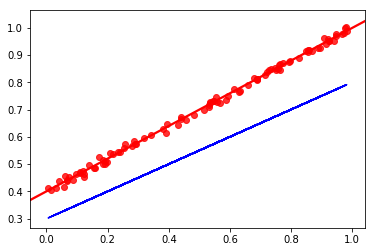

In [22]:
plt.plot(x, 0.3 + 0.5*x, color="b")
ax = sns.regplot(x=x, y=y, color="r")

In training, the model tries to minimize the Loss function and find the parameters that output the minimum loss. The optimal parameters will not be selected randomly. We use **Gradient Descent** to optimize the parameters.

## Gradient Descent for Optimization

## Introduction

Gradient descent is an algorithm used to the find local minimums of any differentiable function. More formally, given a differentiable function $f(x),$ the gradient descent algorithms helps us compute $x^*$ such that $f'(x^*) = 0$ and $x^*$ is a minimum of $f(x).$ A function can have many local minimums $x_{1}^{*}, x_{2}^{*}, \ldots, x_{k}^{*},$ the gradient descent algorithm will converge to one of them depending on the its starting position and learning rate.

Gradient descent (or a variation) is very commonly used to train machine learning models by minimizing some objective function. Many of the objective functions in machine learning are hard to minimize analytically, but we can approximate the minimum using gradient descent. 

<img src="./assets/Linear_Regression/gradient.png" width="300">

>To draw an analogy, imagine a pit in the shape of U and you are standing at the topmost point in the pit and your objective is to reach the bottom of the pit. There is a catch, you can only take a discrete number of steps to reach the bottom. If you decide to take one step at a time you would eventually reach the bottom of the pit but this would take a longer time. If you choose to take longer steps each time, you would reach sooner but, there is a chance that you could overshoot the bottom of the pit and not exactly at the bottom. In the gradient descent algorithm, the number of steps you take is the learning rate. This decides on how fast the algorithm converges to the minima.

<img src="./assets/Linear_Regression/derivative.png" width="300">

>The partial derivates are the gradients and they are used to update the values of a_0 and a_1. Alpha is the learning rate which is a hyperparameter that you must specify. A smaller learning rate could get you closer to the minima but takes more time to reach the minima, a larger learning rate converges sooner but there is a chance that you could overshoot the minima.

# Evaluating a Machine Learning model

#### Training set:
> The actual dataset that we use to train the model(to find out weights in Linear Regression model). The model sees and learns from this data.

#### Validation set:
> The sample of data used to provide an unbiased evaluation of a model fit on the training dataset while tuning model hyperparameters. The model never sees this data while training, this set is used to select the best hyper-parameters and parameters of a model.

#### Test set:
> The sample of data used to provide an unbiased evaluation of a final model fit on the training dataset.

#### Pipeline of a Machine Learning model:
* We use training data to minimize the objective/loss function.
* We use validation data to evaluate and find out best hyper-parameters and parameters.
* We finally test our model on the test data.

# Linear Regression on Housing Dataset

In [24]:
df = pd.read_csv('../data/housing.data',
                 header=None,
                 sep='\s+')
# only select useful columns 
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


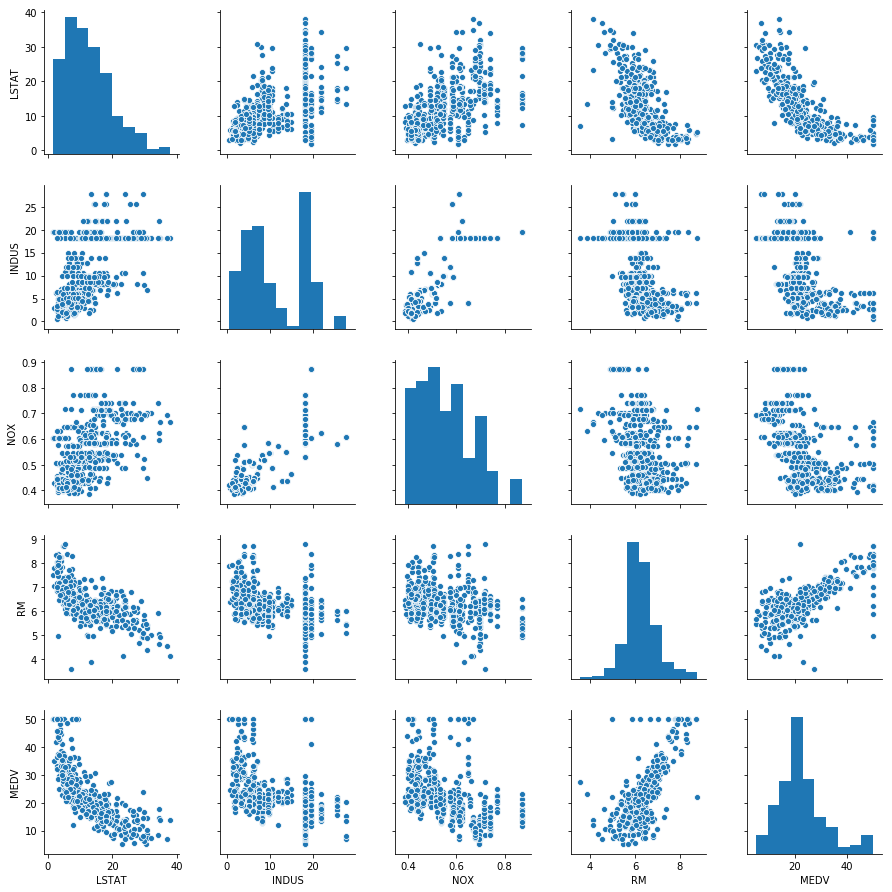

In [25]:
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']

sns.pairplot(df[cols], size=2.5)
plt.tight_layout()
plt.show()

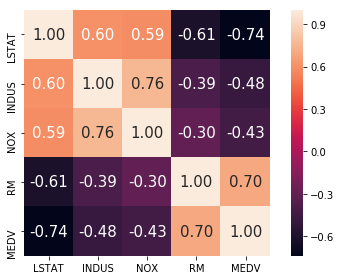

In [26]:
cm = np.corrcoef(df[cols].values.T)
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 15},
                 yticklabels=cols,
                 xticklabels=cols)

plt.tight_layout()
plt.show()

In [27]:
class LinearRegressionGD(object):

    def __init__(self, eta=0.001, n_iter=15):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y, X_test, y_test):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        self.test_cost_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
            self.test_cost_.append(self.calculate_cost(X_test, y_test))
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return self.net_input(X)
    
    def calculate_cost(self, X, y):
        return ((y-self.net_input(X))**2).sum()/2.0

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df[['RM']].values
y = df['MEDV'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

def normalize(X):
    return (X - X.mean())/(X.std())

X_norm_train = normalize(X_train)
y_norm_train = normalize(y_train)

X_norm_test = normalize(X_test)
y_norm_test = normalize(y_test)

In [29]:
lr = LinearRegressionGD()
lr.fit(X_norm_train, y_norm_train, X_norm_test, y_norm_test)

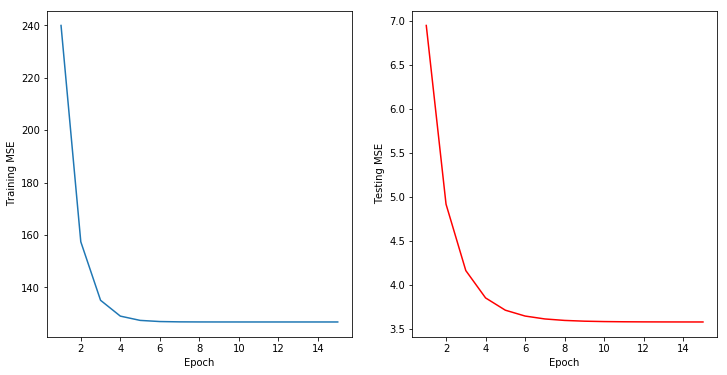

In [30]:
f,ax=plt.subplots(1,2,figsize=(12,6))
ax[0].plot(range(1, lr.n_iter+1), lr.cost_)
ax[1].plot(range(1, lr.n_iter+1), lr.test_cost_, color="r")

ax[0].set_ylabel('Training MSE')
ax[0].set_xlabel('Epoch')

ax[1].set_ylabel('Testing MSE')
ax[1].set_xlabel('Epoch')

plt.show()

In [31]:
print('Slope: %.3f' % lr.w_[1])
print('Intercept: %.3f' % lr.w_[0])

Slope: 0.687
Intercept: -0.000


In [32]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)    
    return

### Estimating the coefficient of a regression model via scikit-learn

In [33]:
from sklearn.linear_model import LinearRegression

slr = LinearRegression()
slr.fit(X_norm_train, y_norm_train)
y_pred = slr.predict(X_norm_train)
print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)

Slope: 0.687
Intercept: -0.000


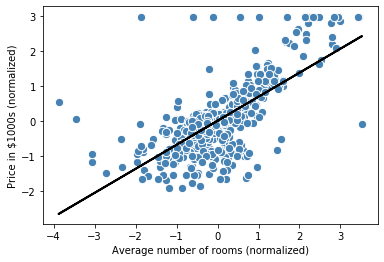

In [20]:
lin_regplot(X_norm_train, y_norm_train, slr)
plt.xlabel('Average number of rooms (normalized)')
plt.ylabel('Price in $1000s (normalized)')

plt.show()